# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [ ]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [ ]:
# Importing the file porter_data_1.csv
df=pd.read_csv("/content/porter_data_1.csv")
df.head(10)

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   
5        1.0  2015-02-06 00:42:42  2015-02-06 01:38:42   
6        1.0  2015-02-08 02:04:17  2015-02-08 03:07:17   
7        1.0  2015-01-31 04:35:54  2015-01-31 05:33:54   
8        1.0  2015-01-31 02:21:23  2015-01-31 02:58:23   
9        1.0  2015-01-31 23:45:12  2015-02-01 00:26:12   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   
5                      38             1.0            3      4475   
6                      38             1.0            3      4375   
7                      38             1.0            2      3150   
8                      46             1.0            2       950   
9                      46             1.0            5      1285   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   
5                   3             925            1825                    4.0   
6                   3            1325            1625                    6.0   
7                   2            1425            1725                    4.0   
8                   2             150             700                   24.0   
9                   3             150             400                   12.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20  
5                 1.0                       1.0     21.68  
6                 4.0                       3.0     31.56  
7                 9.0                      12.0     21.92  
8                24.0                      26.0      8.48  
9                13.0                      11.0     16.96

In [ ]:
df.shape

(175777, 14)

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [ ]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df["created_at"] = pd.to_datetime(df["created_at"], errors="coerce")
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"], errors="coerce")
df.dtypes

market_id                          float64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category               int64
order_protocol                     float64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object

In [ ]:
df.shape

(175777, 14)

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [ ]:
# Convert categorical features to category type

df["market_id"] = df["market_id"].astype("category")
df["store_primary_category"] = df["store_primary_category"].astype("category")
df["order_protocol"] = df["order_protocol"].astype("category")


In [ ]:
df.dtypes

market_id                         category
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object

In [ ]:
df.head(10)

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   
5       1.0 2015-02-06 00:42:42  2015-02-06 01:38:42                     38   
6       1.0 2015-02-08 02:04:17  2015-02-08 03:07:17                     38   
7       1.0 2015-01-31 04:35:54  2015-01-31 05:33:54                     38   
8       1.0 2015-01-31 02:21:23  2015-01-31 02:58:23                     46   
9       1.0 2015-01-31 23:45:12  2015-02-01 00:26:12                     46   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   
5            1.0            3      4475                   3             925   
6            1.0            3      4375                   3            1325   
7            1.0            2      3150                   2            1425   
8            1.0            2       950                   2             150   
9            1.0            5      1285                   3             150   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   
5            1825                    4.0                 1.0   
6            1625                    6.0                 4.0   
7            1725                    4.0                 9.0   
8             700                   24.0                24.0   
9             400                   12.0                13.0   

   total_outstanding_orders  distance  
0                      21.0     34.44  
1                       2.0     27.60  
2                      18.0     11.56  
3                       8.0     31.80  
4                       7.0      8.20  
5                       1.0     21.68  
6                       3.0     31.56  
7                      12.0     21.92  
8                      26.0      8.48  
9                      11.0     16.96

In [ ]:
df.shape

(175777, 14)

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [ ]:
# Calculate time taken in minutes
df["delivery_minutes"] = (df["actual_delivery_time"] - df["created_at"]).dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [ ]:
# Extract the hour and day of week from the 'created_at' timestamp

df["created_hour"] = df["created_at"].dt.hour
# Create a categorical feature 'isWeekend'

df["created_day"] = df["created_at"].dt.dayofweek
print(df[["delivery_minutes", "created_hour", "created_day"]].head())

   delivery_minutes  created_hour  created_day
0              47.0            22            4
1              44.0            21            1
2              55.0             0            0
3              59.0             3            3
4              46.0             2            1


In [ ]:
# Drop unnecessary columns
df = df.drop(["created_at", "actual_delivery_time"], axis=1)
df.head(10)

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   
5       1.0                     38            1.0            3      4475   
6       1.0                     38            1.0            3      4375   
7       1.0                     38            1.0            2      3150   
8       1.0                     46            1.0            2       950   
9       1.0                     46            1.0            5      1285   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   
5                   3             925            1825                    4.0   
6                   3            1325            1625                    6.0   
7                   2            1425            1725                    4.0   
8                   2             150             700                   24.0   
9                   3             150             400                   12.0   

   total_busy_dashers  total_outstanding_orders  distance  delivery_minutes  \
0                14.0                      21.0     34.44              47.0   
1                 2.0                       2.0     27.60              44.0   
2                 6.0                      18.0     11.56              55.0   
3                 6.0                       8.0     31.80              59.0   
4                 5.0                       7.0      8.20              46.0   
5                 1.0                       1.0     21.68              56.0   
6                 4.0                       3.0     31.56              63.0   
7                 9.0                      12.0     21.92              58.0   
8                24.0                      26.0      8.48              37.0   
9                13.0                      11.0     16.96              41.0   

   created_hour  created_day  
0            22            4  
1            21            1  
2             0            0  
3             3            3  
4             2            1  
5             0            4  
6             2            6  
7             4            5  
8             2            5  
9            23            5

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  category
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null  float64 
 10  total_outstanding_orders  175777 non-null  float64 
 11  distance                  175777 non-null  float64 
 12  delivery_minutes          175777 non-null  float64 
 13  created_hour              175

In [ ]:
df.describe()

total_items       subtotal  num_distinct_items  min_item_price  \
count  175777.000000  175777.000000       175777.000000   175777.000000   
mean        3.204976    2697.111147            2.675060      684.965433   
std         2.674055    1828.554893            1.625681      519.882924   
min         1.000000       0.000000            1.000000      -86.000000   
25%         2.000000    1412.000000            1.000000      299.000000   
50%         3.000000    2224.000000            2.000000      595.000000   
75%         4.000000    3410.000000            3.000000      942.000000   
max       411.000000   26800.000000           20.000000    14700.000000   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count   175777.000000          175777.000000       175777.000000   
mean      1160.158616              44.918664           41.861381   
std        560.828571              34.544724           32.168505   
min          0.000000              -4.000000           -5.000000   
25%        799.000000              17.000000           15.000000   
50%       1095.000000              37.000000           35.000000   
75%       1395.000000              66.000000           63.000000   
max      14700.000000             171.000000          154.000000   

       total_outstanding_orders       distance  delivery_minutes  \
count             175777.000000  175777.000000     175777.000000   
mean                  58.230115      21.843090         46.203013   
std                   52.731043       8.748712          9.327424   
min                   -6.000000       0.000000         32.000000   
25%                   17.000000      15.360000         39.000000   
50%                   41.000000      21.760000         45.000000   
75%                   85.000000      28.120000         52.000000   
max                  285.000000      83.520000        110.000000   

        created_hour    created_day  
count  175777.000000  175777.000000  
mean        8.473441       3.222293  
std         8.676809       2.043874  
min         0.000000       0.000000  
25%         2.000000       1.000000  
50%         3.000000       3.000000  
75%        19.000000       5.000000  
max        23.000000       6.000000

In [ ]:
df.shape

(175777, 15)

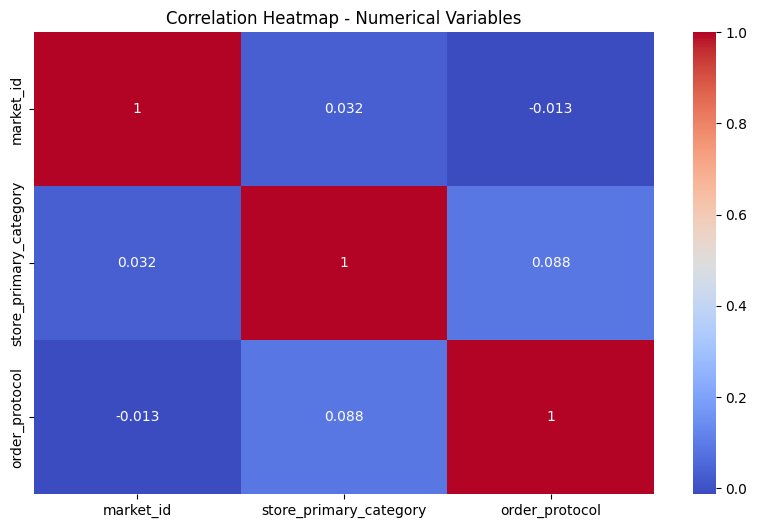

In [ ]:
df_catogory=df[['market_id','store_primary_category','order_protocol']]
plt.figure(figsize=(10,6))
sns.heatmap(df_catogory.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Numerical Variables")
plt.show()

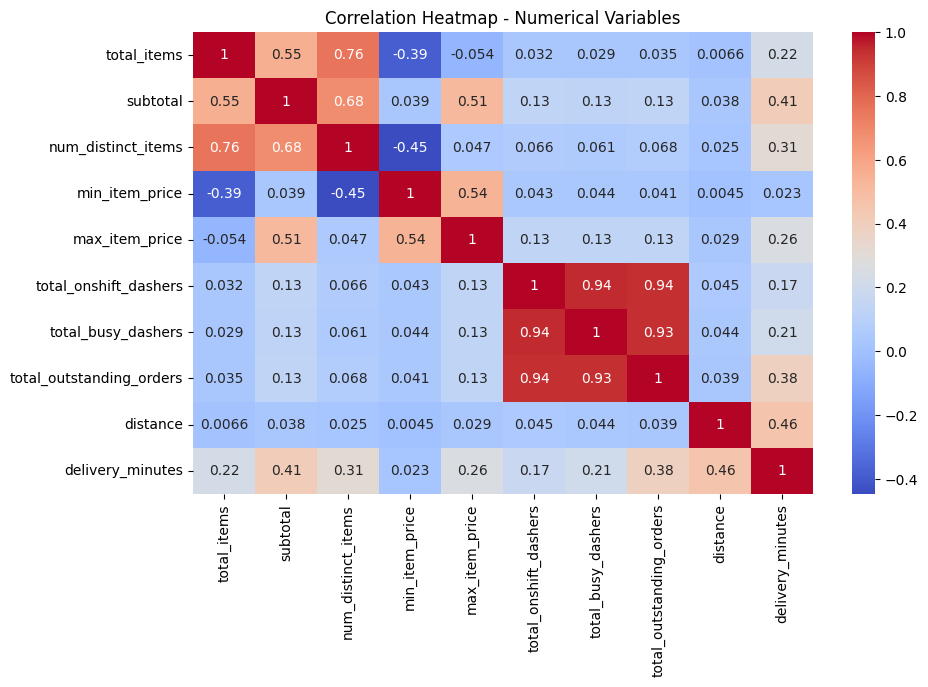

In [ ]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns

# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Numerical Variables")
plt.show()

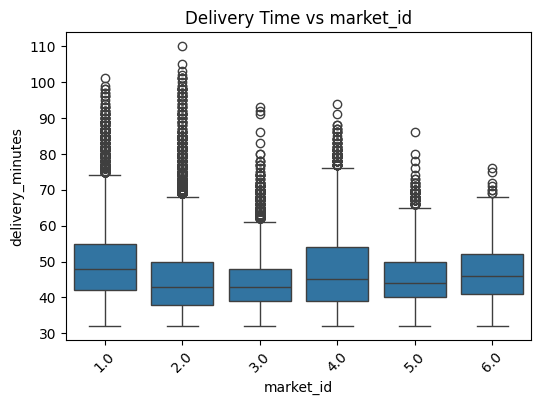

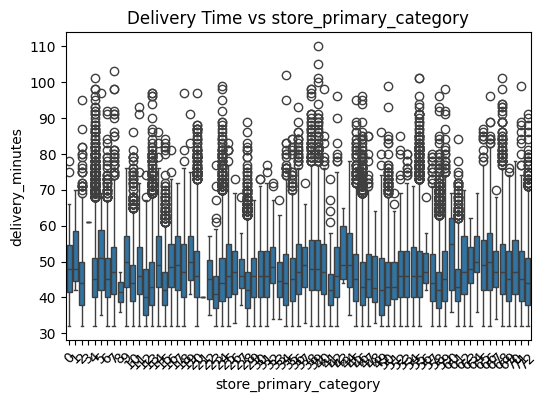

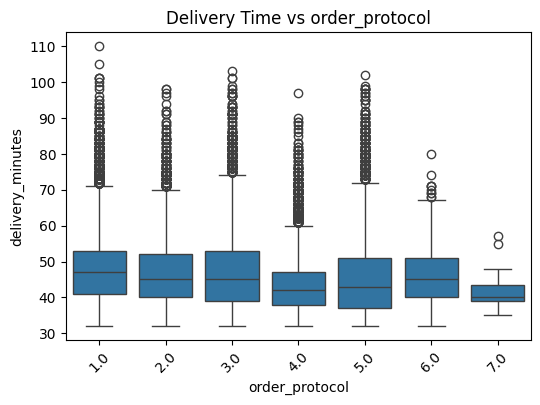

In [ ]:
cat_cols = df.select_dtypes(include=["category"]).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], y=df["delivery_minutes"])
    plt.title(f"Delivery Time vs {col}")
    plt.xticks(rotation=45)
    plt.show()

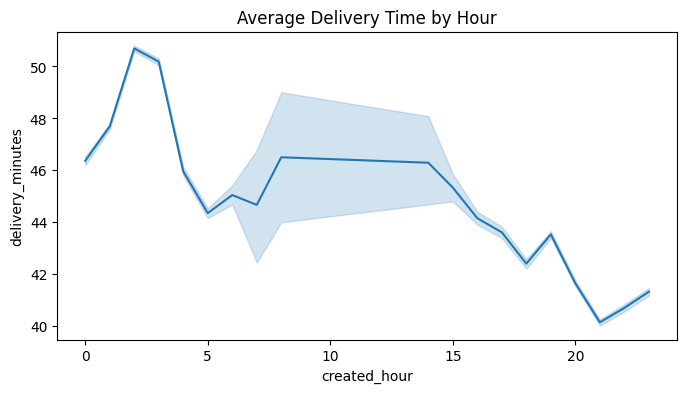

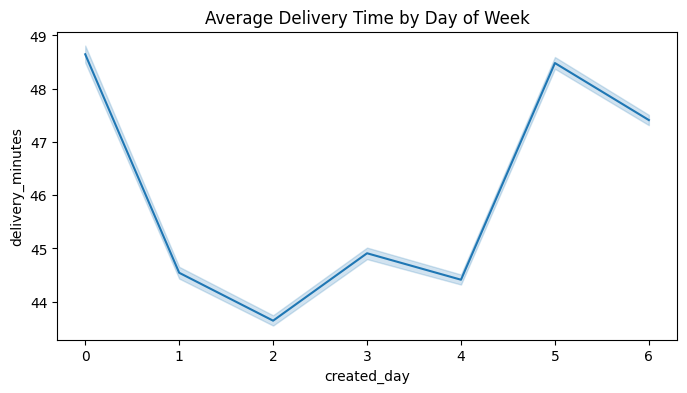

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(x="created_hour", y="delivery_minutes", data=df)
plt.title("Average Delivery Time by Hour")
plt.show()

# Lineplot: day vs delivery time
plt.figure(figsize=(8,4))
sns.lineplot(x="created_day", y="delivery_minutes", data=df)
plt.title("Average Delivery Time by Day of Week")
plt.show()

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [ ]:
# Define target variable (y) and features (X)
X = df.drop("delivery_minutes", axis=1)
y = df["delivery_minutes"]

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [ ]:
# Split data into training and testing sets
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=100
)


In [ ]:
X_train.shape

(140621, 14)

In [ ]:
X_train.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
42111        3.0                      7            2.0            1      1350   
58452        2.0                     46            5.0            5      4285   
20644        4.0                     45            2.0            6      7880   
79735        4.0                     45            2.0            3      3660   
167933       1.0                      4            5.0            5      8575   

        num_distinct_items  min_item_price  max_item_price  \
42111                    1            1350            1350   
58452                    5             495             900   
20644                    3            1195            1450   
79735                    3             975            1450   
167933                   5            1200            2625   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
42111                    23.0                20.0                      19.0   
58452                   112.0               100.0                     207.0   
20644                    80.0                79.0                     115.0   
79735                   127.0               106.0                     173.0   
167933                   44.0                44.0                      61.0   

        distance  created_hour  created_day  
42111       9.60            20            0  
58452      34.56             2            5  
20644      34.92             3            4  
79735      25.76             2            5  
167933     17.72             2            3

In [ ]:
y_train.shape

(140621,)

In [ ]:
y_train.head()

42111     32.0
58452     71.0
20644     62.0
79735     54.0
167933    56.0
Name: delivery_minutes, dtype: float64

In [ ]:
X_test.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
139667       1.0                     45            1.0            3      1295   
80077        1.0                      4            1.0            2      2950   
41872        1.0                     46            4.0            1      1395   
165269       4.0                     24            5.0            2      2967   
151215       4.0                      6            2.0            3      1250   

        num_distinct_items  min_item_price  max_item_price  \
139667                   2             150             995   
80077                    1            1225            1225   
41872                    1            1395            1395   
165269                   2            1097            1249   
151215                   2             375             400   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
139667                   59.0                59.0                      61.0   
80077                    18.0                17.0                      16.0   
41872                    28.0                27.0                      45.0   
165269                  124.0               127.0                     200.0   
151215                   39.0                30.0                      33.0   

        distance  created_hour  created_day  
139667     20.56             3            4  
80077      12.84             1            5  
41872      16.80             3            3  
165269     19.00             3            5  
151215     26.72            22            5

In [ ]:
y_test.head()

139667    39.0
80077     42.0
41872     48.0
165269    55.0
151215    37.0
Name: delivery_minutes, dtype: float64

In [ ]:
y_train.shape

(140621,)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 42111 to 38408
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 140621 non-null  category
 1   store_primary_category    140621 non-null  category
 2   order_protocol            140621 non-null  category
 3   total_items               140621 non-null  int64   
 4   subtotal                  140621 non-null  int64   
 5   num_distinct_items        140621 non-null  int64   
 6   min_item_price            140621 non-null  int64   
 7   max_item_price            140621 non-null  int64   
 8   total_onshift_dashers     140621 non-null  float64 
 9   total_busy_dashers        140621 non-null  float64 
 10  total_outstanding_orders  140621 non-null  float64 
 11  distance                  140621 non-null  float64 
 12  created_hour              140621 non-null  int32   
 13  created_day               14062

In [ ]:
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns

# Categorical columns
cat_cols = X_train.select_dtypes(include=["category", "object"]).columns

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

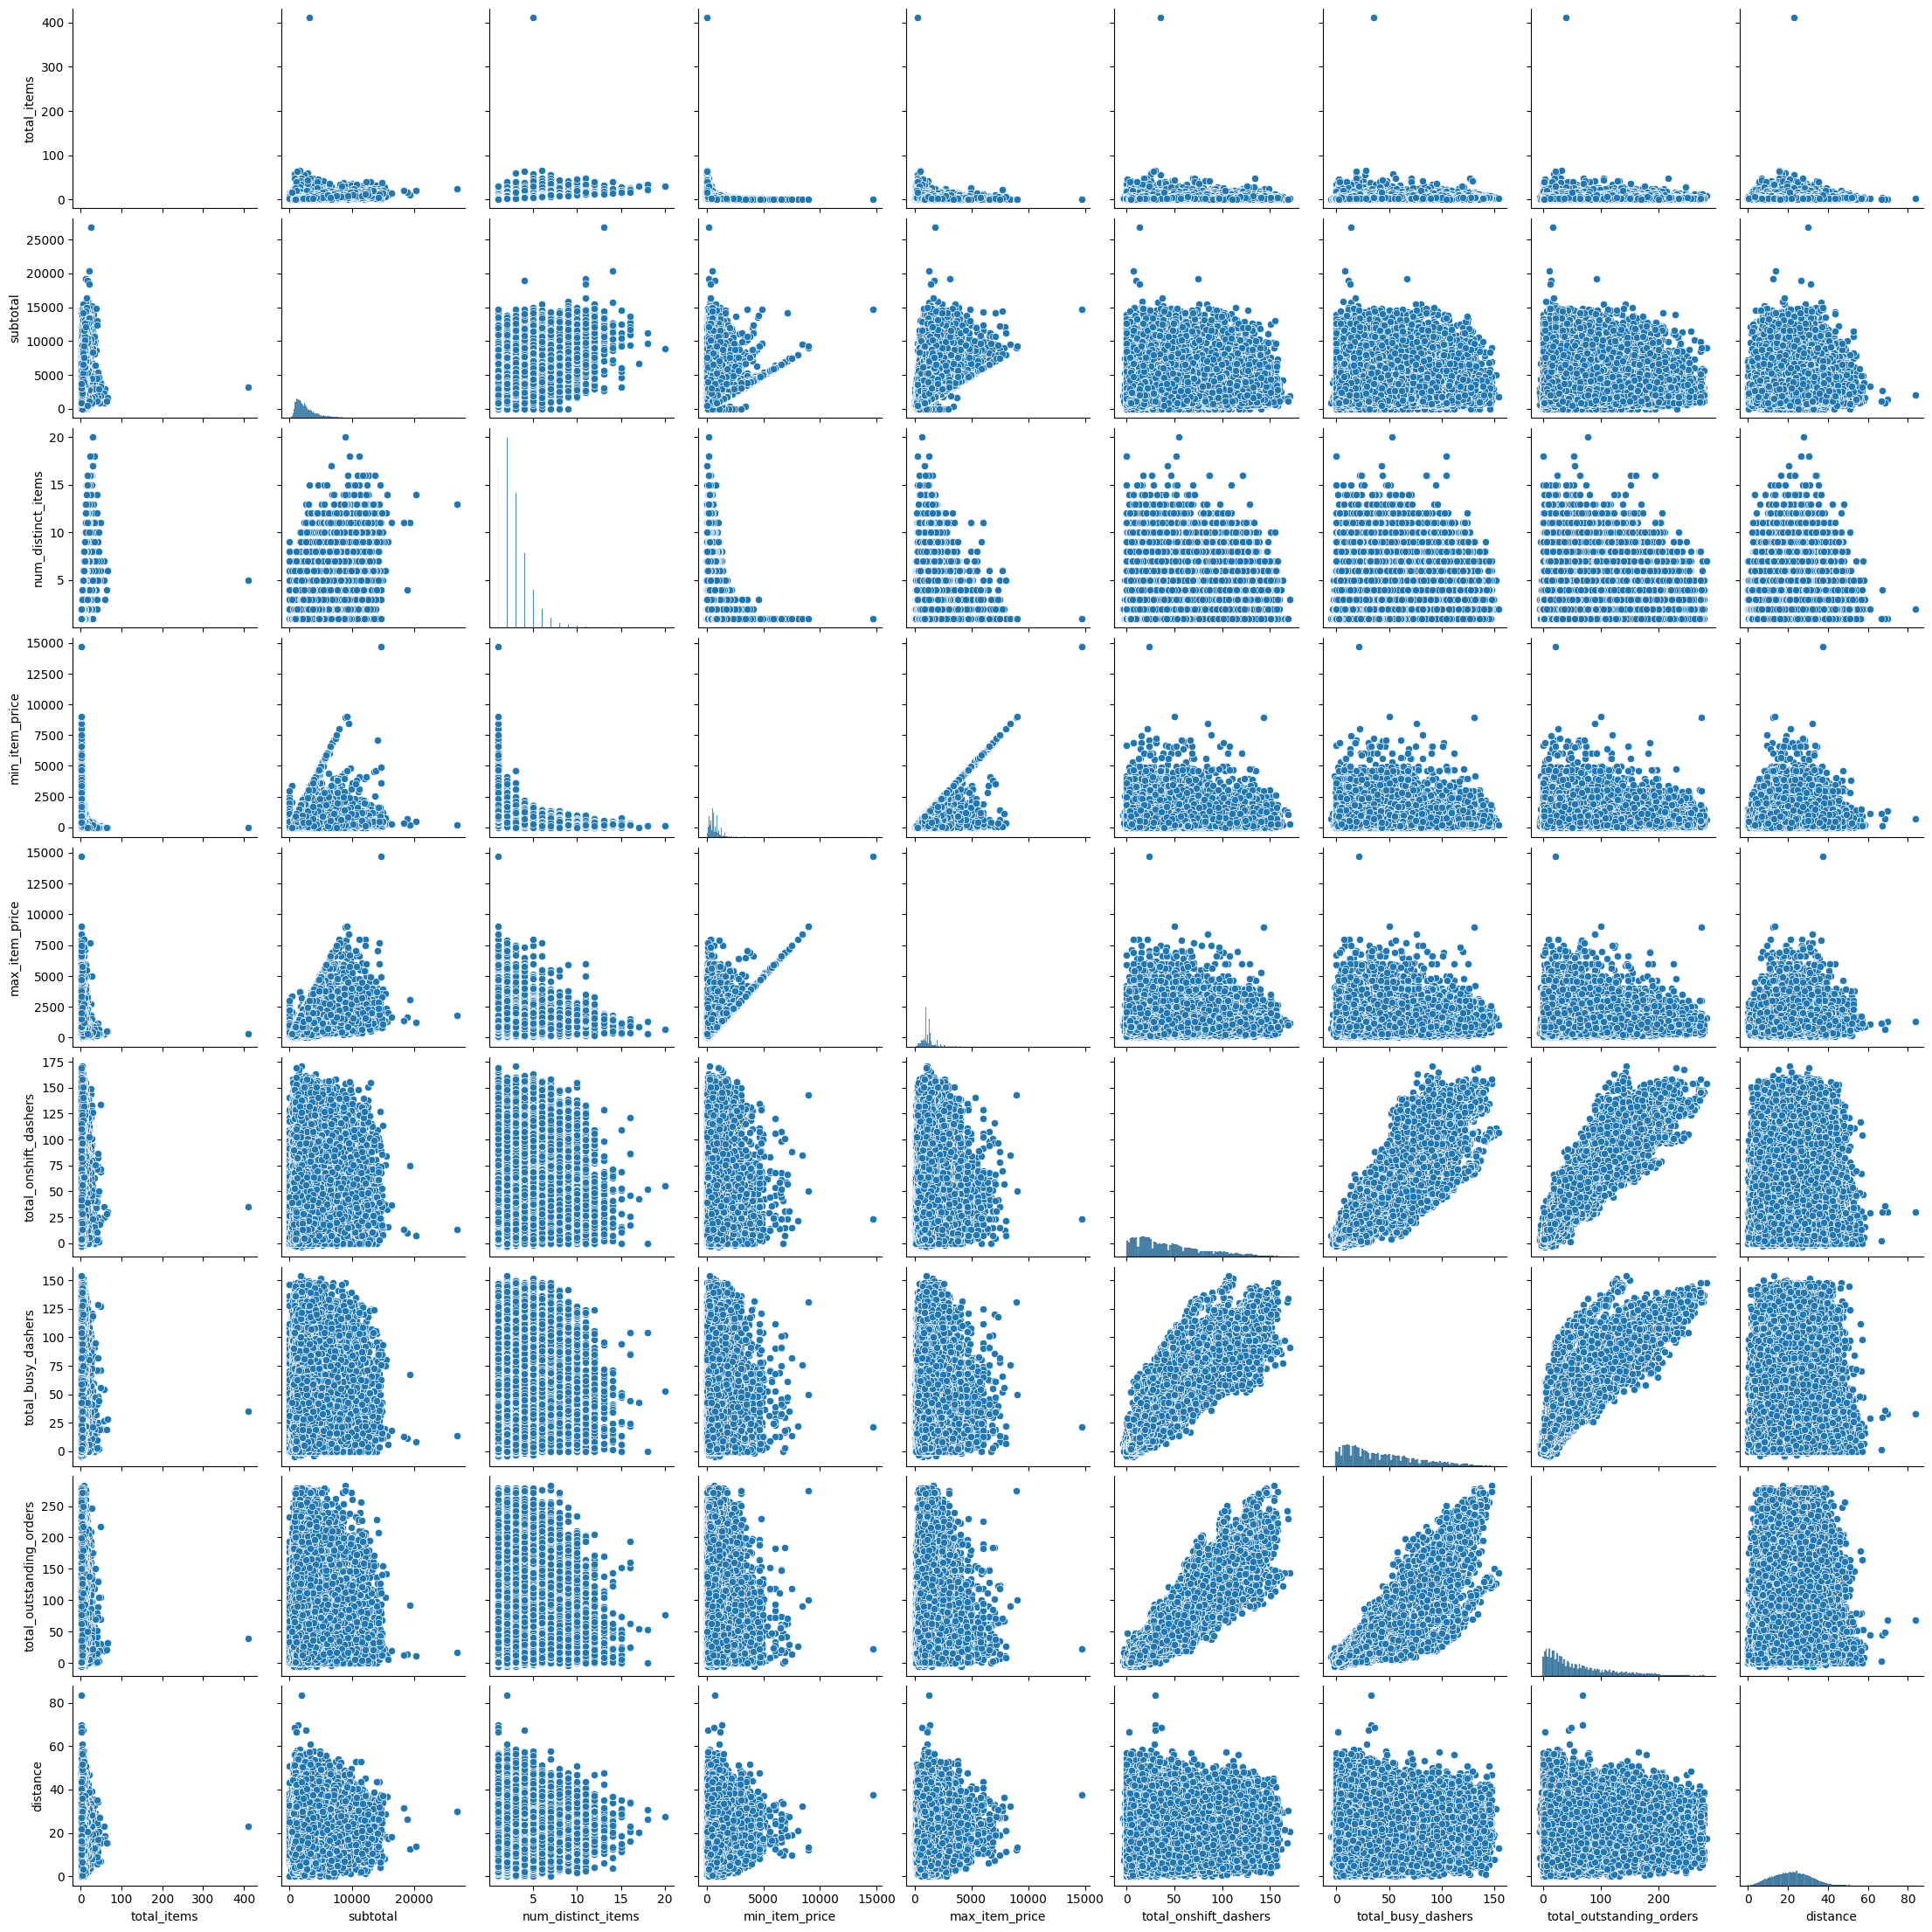

In [ ]:
# Plot distributions for all numerical columns
sns.pairplot(X_train[num_cols])
plt.show()


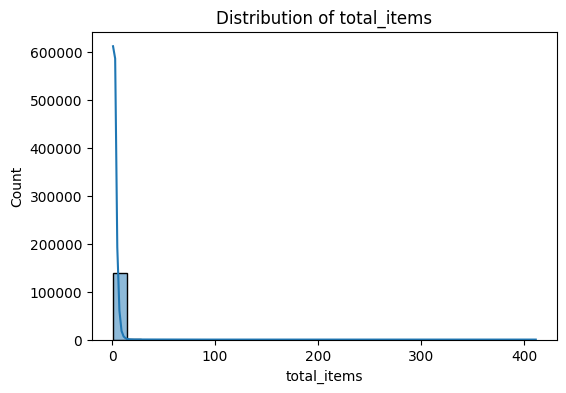

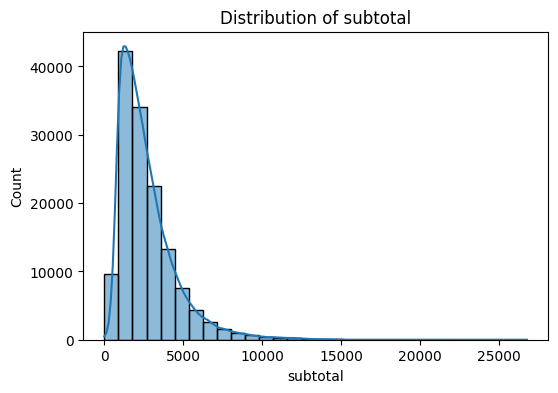

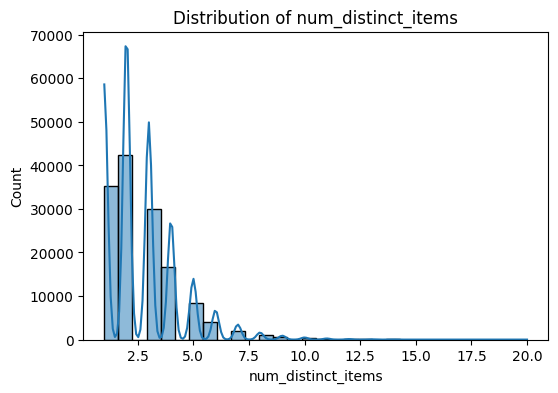

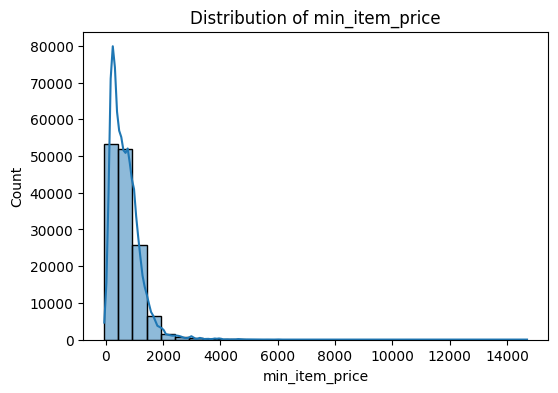

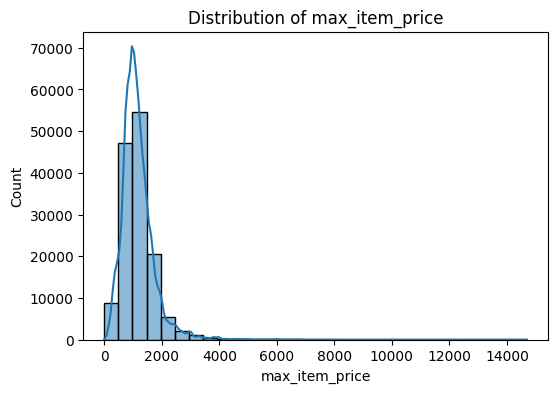

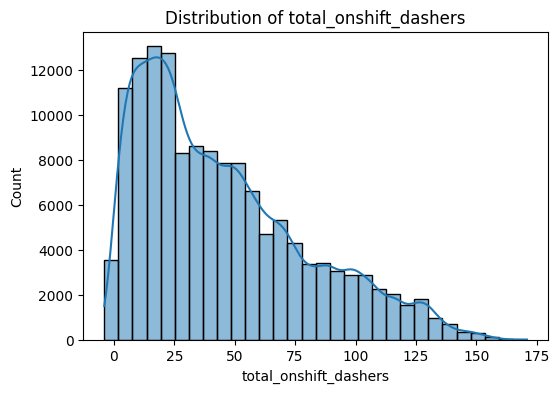

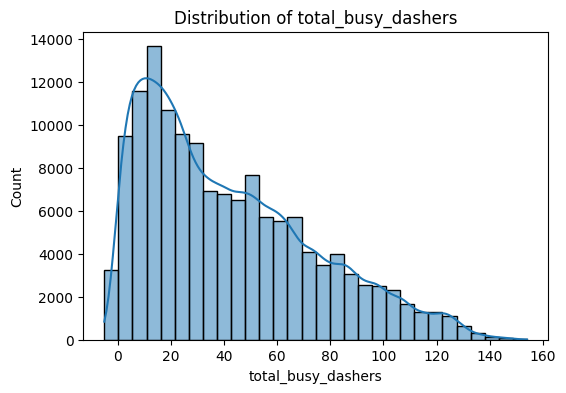

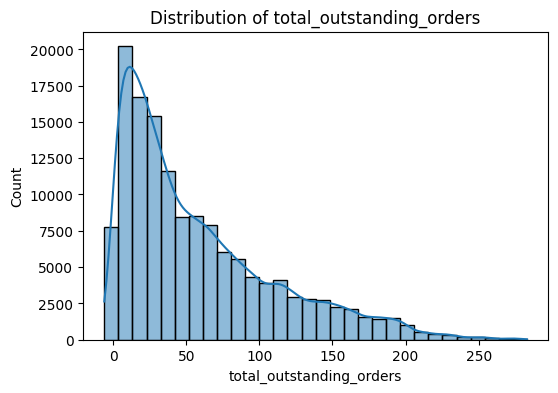

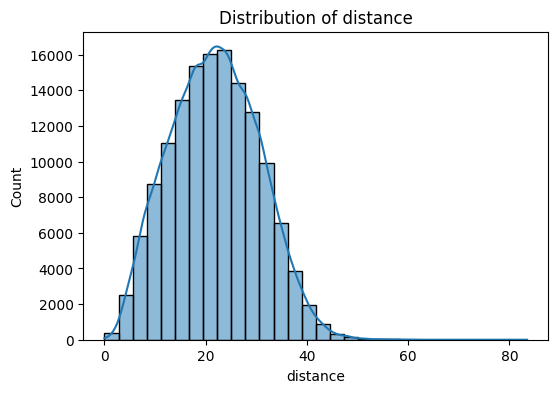

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(X_train[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

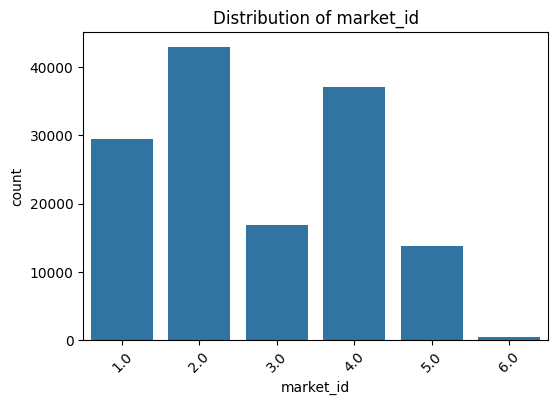

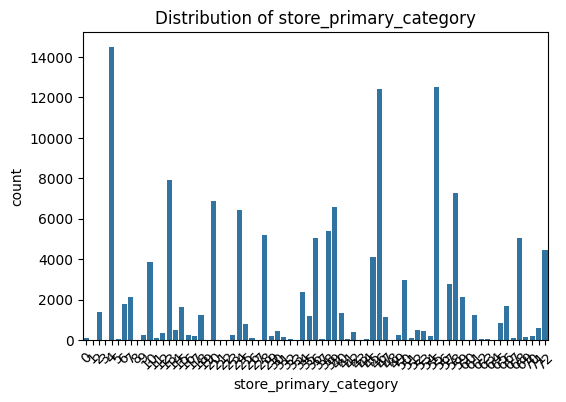

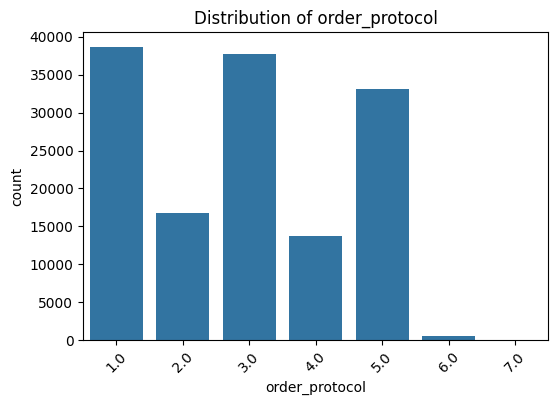

In [ ]:
# Distribution of categorical columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=X_train[col])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

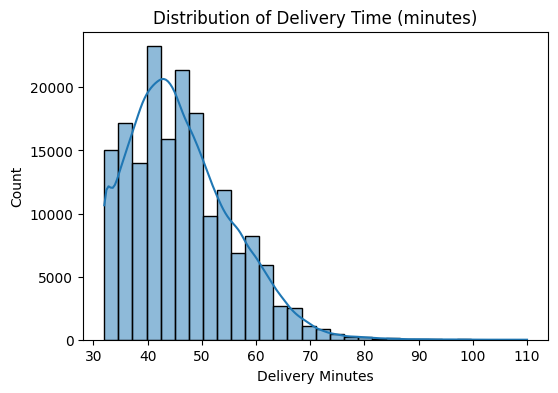

In [ ]:
# Distribution of time_taken

plt.figure(figsize=(6,4))
sns.histplot(y, bins=30, kde=True)
plt.title("Distribution of Delivery Time (minutes)")
plt.xlabel("Delivery Minutes")
plt.ylabel("Count")
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



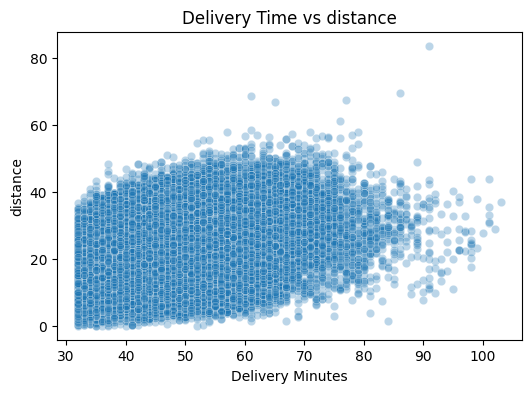

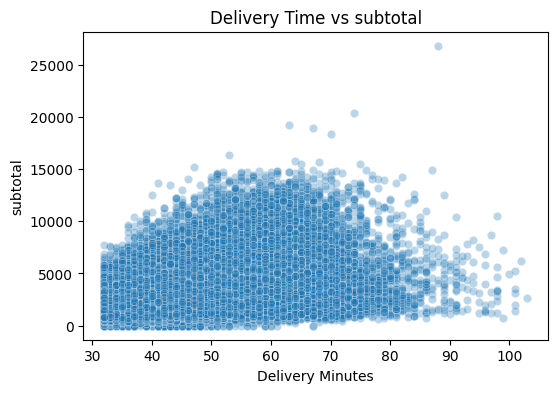

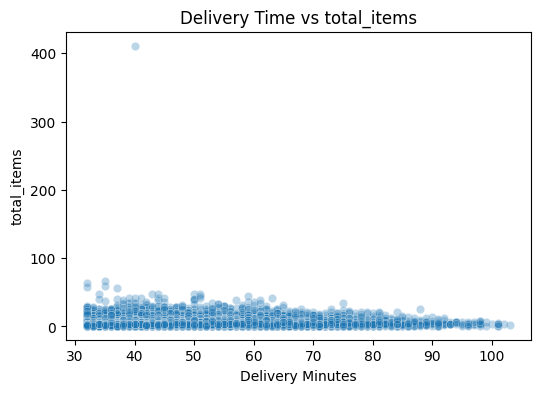

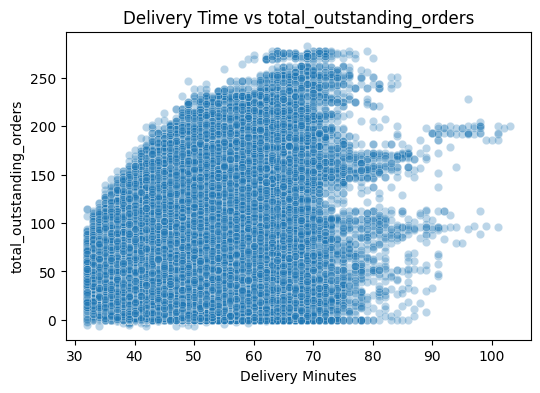

In [ ]:
# Show the distribution of time_taken for different hours

important_num = ["distance", "subtotal", "total_items", "total_outstanding_orders"]

for col in important_num:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=y_train, y=X_train[col], alpha=0.3)
    plt.title(f"Delivery Time vs {col}")
    plt.xlabel("Delivery Minutes")
    plt.ylabel(col)
    plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

delivery_minutes            1.000000
distance                    0.460237
subtotal                    0.413293
total_outstanding_orders    0.382738
num_distinct_items          0.312917
max_item_price              0.254416
total_items                 0.220891
total_busy_dashers          0.203979
total_onshift_dashers       0.168299
min_item_price              0.023411
Name: delivery_minutes, dtype: float64


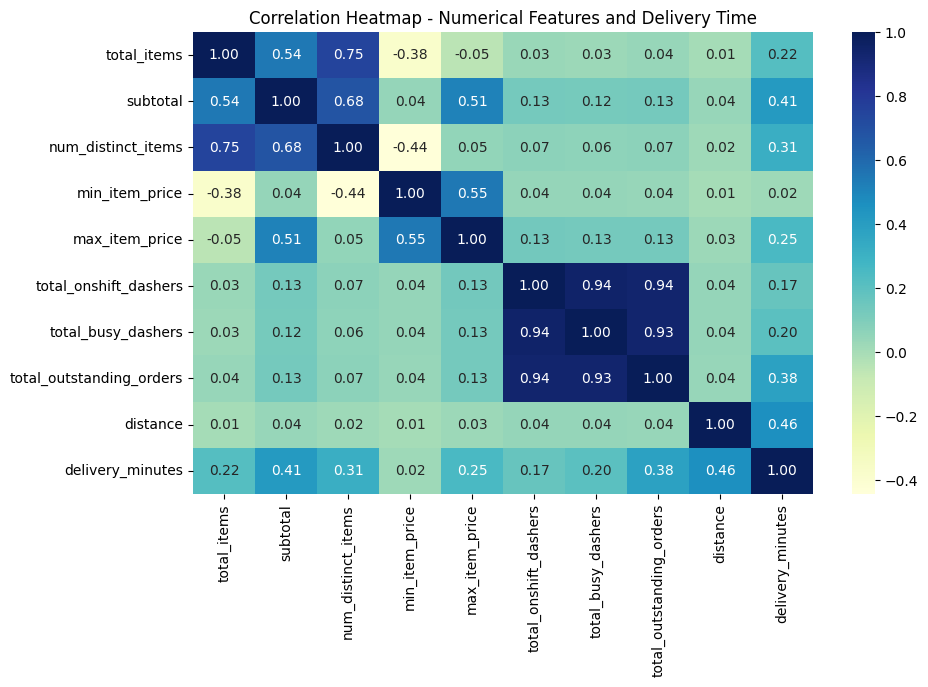

In [ ]:
# Plot the heatmap of the correlation matrix

train_num = X_train[num_cols].copy()
train_num["delivery_minutes"] = y_train

# Correlation matrix
corr_matrix = train_num.corr()

# Print correlations with target
print(corr_matrix["delivery_minutes"].sort_values(ascending=False))

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap - Numerical Features and Delivery Time")
plt.show()


In [ ]:
X_train.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
42111        3.0                      7            2.0            1      1350   
58452        2.0                     46            5.0            5      4285   
20644        4.0                     45            2.0            6      7880   
79735        4.0                     45            2.0            3      3660   
167933       1.0                      4            5.0            5      8575   

        num_distinct_items  min_item_price  max_item_price  \
42111                    1            1350            1350   
58452                    5             495             900   
20644                    3            1195            1450   
79735                    3             975            1450   
167933                   5            1200            2625   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
42111                    23.0                20.0                      19.0   
58452                   112.0               100.0                     207.0   
20644                    80.0                79.0                     115.0   
79735                   127.0               106.0                     173.0   
167933                   44.0                44.0                      61.0   

        distance  created_hour  created_day  
42111       9.60            20            0  
58452      34.56             2            5  
20644      34.92             3            4  
79735      25.76             2            5  
167933     17.72             2            3

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 42111 to 38408
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 140621 non-null  category
 1   store_primary_category    140621 non-null  category
 2   order_protocol            140621 non-null  category
 3   total_items               140621 non-null  int64   
 4   subtotal                  140621 non-null  int64   
 5   num_distinct_items        140621 non-null  int64   
 6   min_item_price            140621 non-null  int64   
 7   max_item_price            140621 non-null  int64   
 8   total_onshift_dashers     140621 non-null  float64 
 9   total_busy_dashers        140621 non-null  float64 
 10  total_outstanding_orders  140621 non-null  float64 
 11  distance                  140621 non-null  float64 
 12  created_hour              140621 non-null  int32   
 13  created_day               14062

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [ ]:
# Drop 3-5 weakly correlated columns from training dataset
weak_cols = ["min_item_price", "total_onshift_dashers", "total_busy_dashers", "total_items"]

X_train = X_train.drop(weak_cols, axis=1)
X_test = X_test.drop(weak_cols, axis=1)




In [ ]:
X_test.head()

market_id store_primary_category order_protocol  subtotal  \
139667       1.0                     45            1.0      1295   
80077        1.0                      4            1.0      2950   
41872        1.0                     46            4.0      1395   
165269       4.0                     24            5.0      2967   
151215       4.0                      6            2.0      1250   

        num_distinct_items  max_item_price  total_outstanding_orders  \
139667                   2             995                      61.0   
80077                    1            1225                      16.0   
41872                    1            1395                      45.0   
165269                   2            1249                     200.0   
151215                   2             400                      33.0   

        distance  created_hour  created_day  
139667     20.56             3            4  
80077      12.84             1            5  
41872      16.80             3            3  
165269     19.00             3            5  
151215     26.72            22            5

In [ ]:
X_train.head()

market_id store_primary_category order_protocol  subtotal  \
42111        3.0                      7            2.0      1350   
58452        2.0                     46            5.0      4285   
20644        4.0                     45            2.0      7880   
79735        4.0                     45            2.0      3660   
167933       1.0                      4            5.0      8575   

        num_distinct_items  max_item_price  total_outstanding_orders  \
42111                    1            1350                      19.0   
58452                    5             900                     207.0   
20644                    3            1450                     115.0   
79735                    3            1450                     173.0   
167933                   5            2625                      61.0   

        distance  created_hour  created_day  
42111       9.60            20            0  
58452      34.56             2            5  
20644      34.92             3            4  
79735      25.76             2            5  
167933     17.72             2            3

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

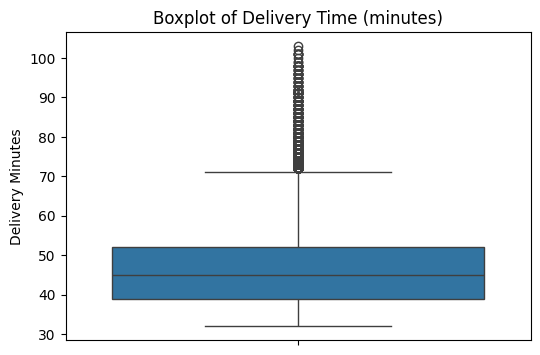

In [ ]:
# Boxplot for time_taken

# Boxplot for target variable (delivery_minutes)
plt.figure(figsize=(6,4))
sns.boxplot(y=y_train)
plt.title("Boxplot of Delivery Time (minutes)")
plt.ylabel("Delivery Minutes")
plt.show()


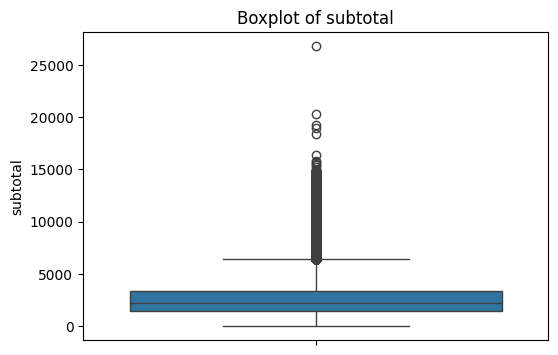

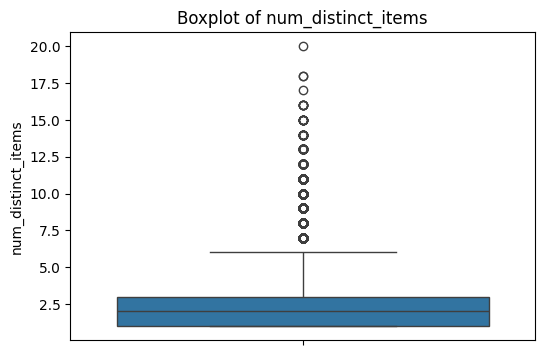

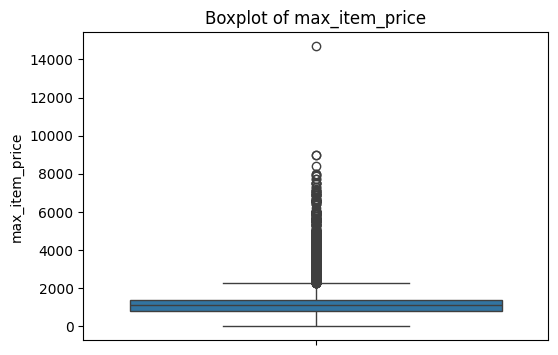

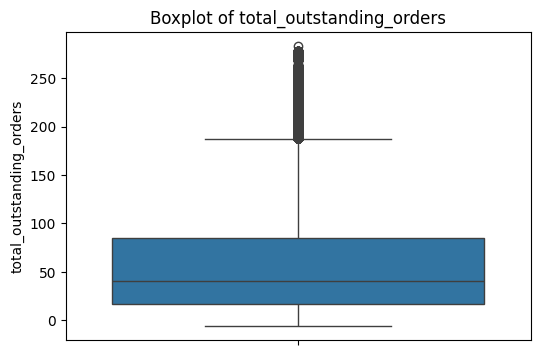

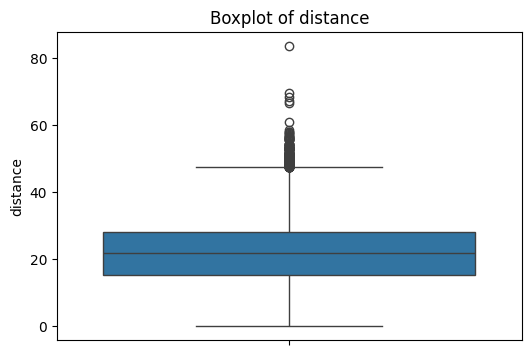

In [ ]:
# target variable and other numerical features using boxplots
num_cols_remaining=X_train.select_dtypes(include=["int64", "float64"]).columns


for col in num_cols_remaining:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=X_train[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [ ]:
# Handle outliers


def handle_outliers_iqr(data, cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        # Cap the outliers
        data[col] = np.where(data[col] < lower_limit, lower_limit,
                   np.where(data[col] > upper_limit, upper_limit, data[col]))
    return data

# Apply to training and test sets
X_train = handle_outliers_iqr(X_train, num_cols_remaining)
X_test = handle_outliers_iqr(X_test, num_cols_remaining)



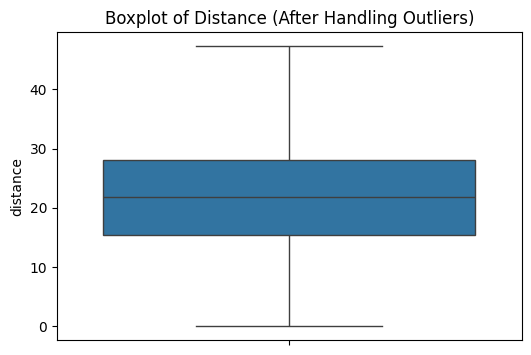

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=X_train["distance"])
plt.title("Boxplot of Distance (After Handling Outliers)")
plt.show()

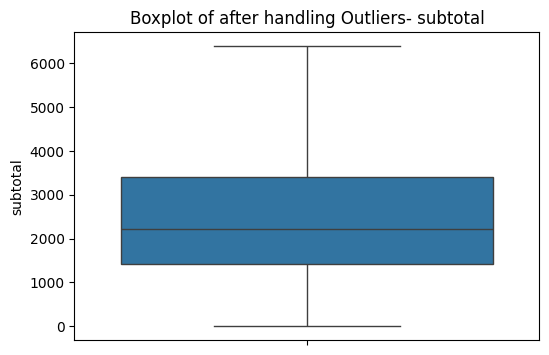

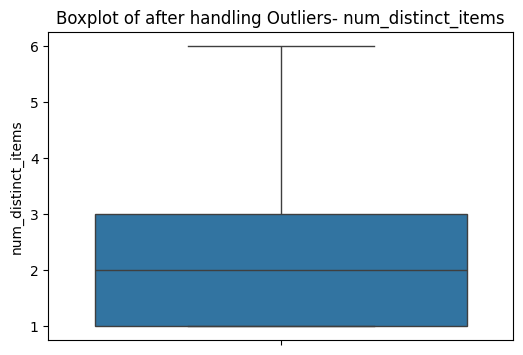

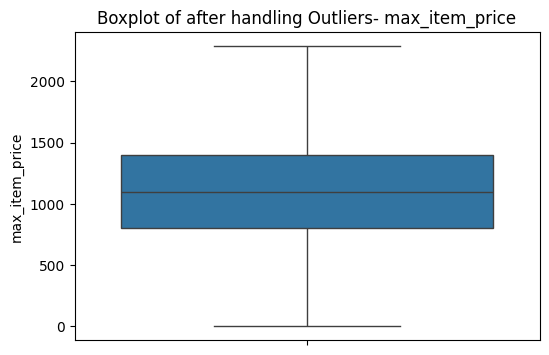

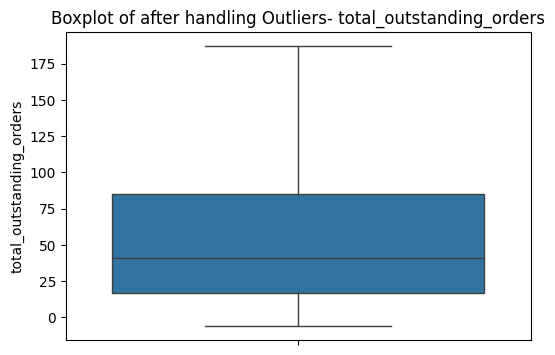

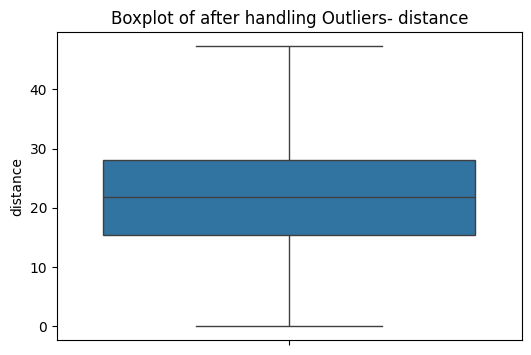

In [ ]:
num_cols_remaining=X_train.select_dtypes(include=["int64", "float64"]).columns


for col in num_cols_remaining:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=X_train[col])
    plt.title(f"Boxplot of after handling Outliers- {col}")
    plt.ylabel(col)
    plt.show()

In [ ]:
X_train.describe()

subtotal  num_distinct_items  max_item_price  \
count  140621.000000       140621.000000   140621.000000   
mean     2607.018169            2.612327     1134.365806   
std      1531.278246            1.426532      464.213253   
min         0.000000            1.000000        0.000000   
25%      1415.000000            1.000000      799.000000   
50%      2220.000000            2.000000     1095.000000   
75%      3407.000000            3.000000     1395.000000   
max      6395.000000            6.000000     2289.000000   

       total_outstanding_orders       distance   created_hour    created_day  
count             140621.000000  140621.000000  140621.000000  140621.000000  
mean                  57.559710      21.828159       8.473365       3.224383  
std                   50.722513       8.733147       8.676889       2.041730  
min                   -6.000000       0.000000       0.000000       0.000000  
25%                   17.000000      15.320000       2.000000       1.000000  
50%                   41.000000      21.760000       3.000000       3.000000  
75%                   85.000000      28.120000      19.000000       5.000000  
max                  187.000000      47.320000      23.000000       6.000000

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 42111 to 38408
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 140621 non-null  category
 1   store_primary_category    140621 non-null  category
 2   order_protocol            140621 non-null  category
 3   subtotal                  140621 non-null  float64 
 4   num_distinct_items        140621 non-null  float64 
 5   max_item_price            140621 non-null  float64 
 6   total_outstanding_orders  140621 non-null  float64 
 7   distance                  140621 non-null  float64 
 8   created_hour              140621 non-null  int32   
 9   created_day               140621 non-null  int32   
dtypes: category(3), float64(5), int32(2)
memory usage: 7.9 MB


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation

num_cols_test = X_test.select_dtypes(include=["int64", "float64"]).columns
cat_cols_test = X_test.select_dtypes(include=["category", "object"]).columns



In [ ]:

num_cols_test

Index(['subtotal', 'num_distinct_items', 'max_item_price',
       'total_outstanding_orders', 'distance'],
      dtype='object')

In [ ]:
cat_cols_test

Index(['market_id', 'store_primary_category', 'order_protocol'], dtype='object')

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

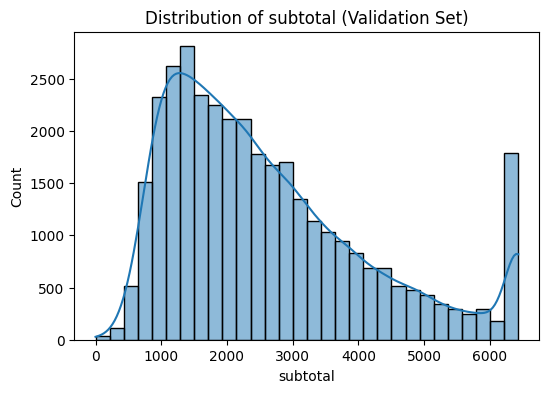

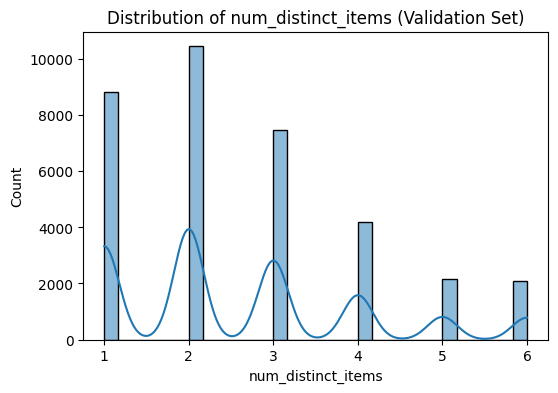

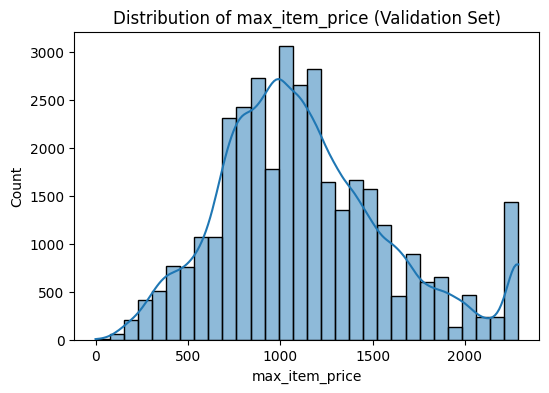

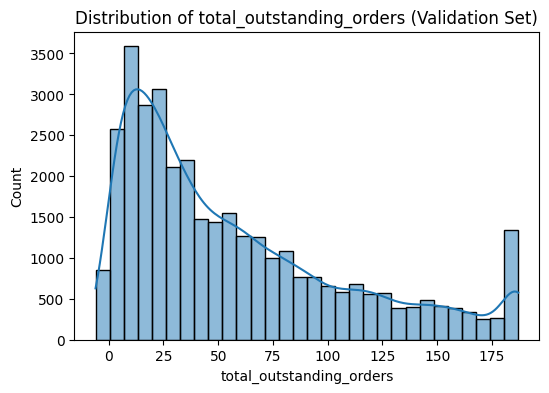

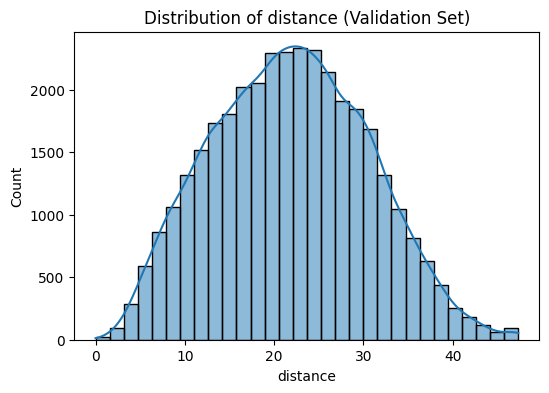

In [ ]:
# Plot distributions for all numerical columns

for col in num_cols_test:
    plt.figure(figsize=(6,4))
    sns.histplot(X_test[col], kde=True, bins=30)
    plt.title(f"Distribution of {col} (Validation Set)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

##### **4.1.2**
Check the distribution of categorical features

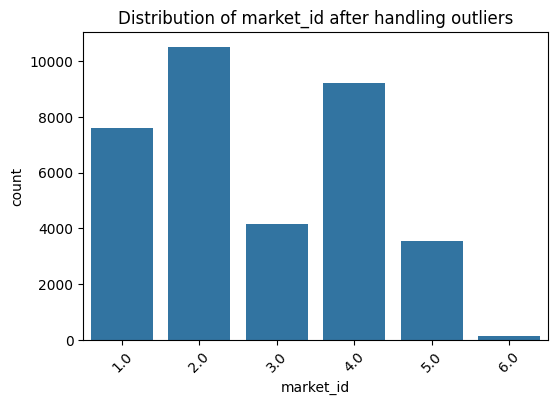

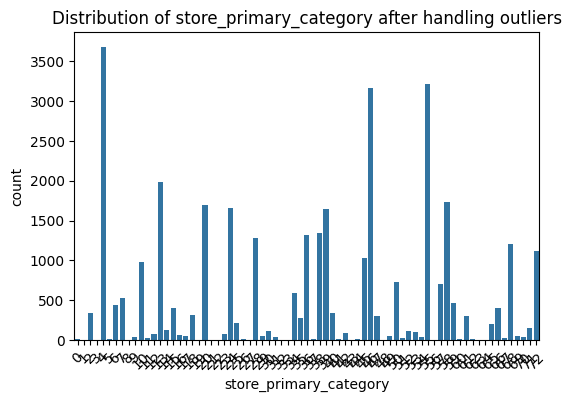

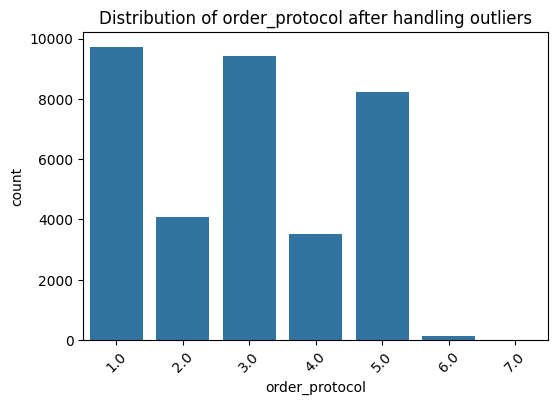

In [ ]:
# Distribution of categorical columns

for col in cat_cols_test:
    plt.figure(figsize=(6,4))
    sns.countplot(x=X_test[col])
    plt.title(f"Distribution of {col} after handling outliers")
    plt.xticks(rotation=45)
    plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

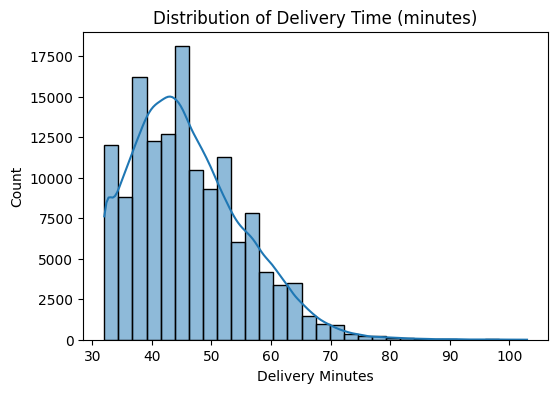

In [ ]:
# Distribution of time_taken

plt.figure(figsize=(6,4))
sns.histplot(y_train, bins=30, kde=True)
plt.title("Distribution of Delivery Time (minutes)")
plt.xlabel("Delivery Minutes")
plt.ylabel("Count")
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

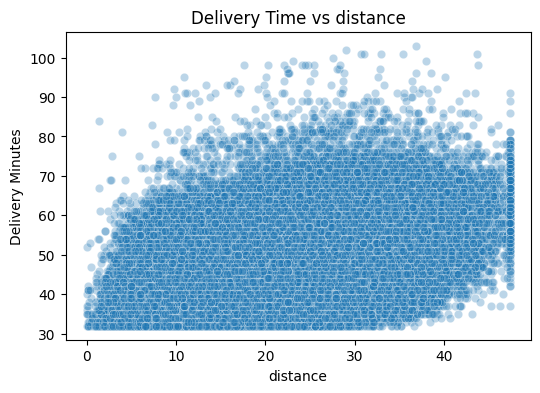

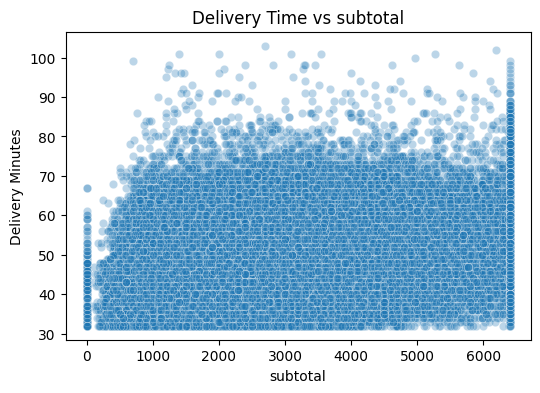

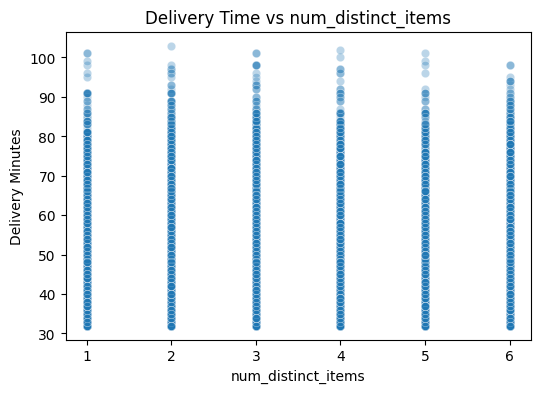

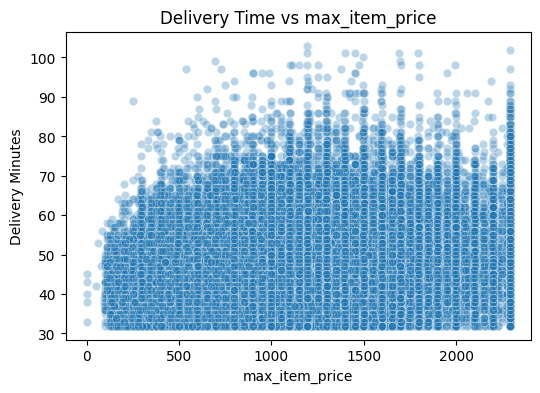

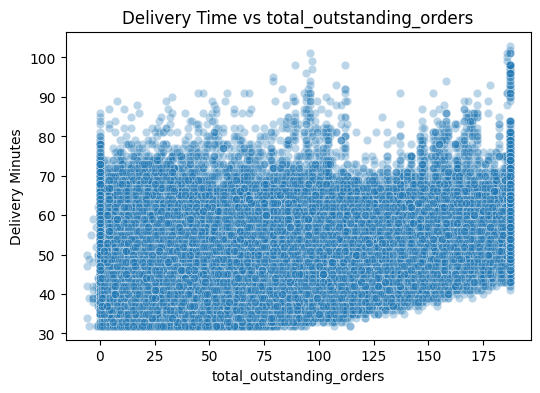

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features

important_num = ["distance", "subtotal", "num_distinct_items", "max_item_price", "total_outstanding_orders"]
for col in important_num:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.3)
    plt.title(f"Delivery Time vs {col}")
    plt.xlabel(col)
    plt.ylabel("Delivery Minutes")
    plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset

train_num = X_train.select_dtypes(include=["int64", "float64"]).copy()
train_num["delivery_minutes"] = y_train

corr_with_target = train_num.corr()["delivery_minutes"].sort_values(ascending=False)
print(corr_with_target)

delivery_minutes            1.000000
distance                    0.459830
subtotal                    0.416109
total_outstanding_orders    0.373221
num_distinct_items          0.307332
max_item_price              0.266654
Name: delivery_minutes, dtype: float64


In [ ]:
X_train = X_train.drop("max_item_price", axis=1)
X_test = X_test.drop("max_item_price", axis=1)
print("Remaining columns after dropping weak features:", X_train.columns.tolist())


Remaining columns after dropping weak features: ['market_id', 'store_primary_category', 'order_protocol', 'subtotal', 'num_distinct_items', 'total_outstanding_orders', 'distance', 'created_hour', 'created_day']


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [ ]:
X_train_original = X_train.copy()
X_test_original  = X_test.copy()

In [ ]:
scaler= MinMaxScaler()

In [ ]:
# Apply scaling to the numerical columns

num_vars=['distance','subtotal','total_outstanding_orders','num_distinct_items']


X_train[num_vars]=scaler.fit_transform(X_train[num_vars])


In [ ]:
X_train.head()

market_id store_primary_category order_protocol  subtotal  \
42111        3.0                      7            2.0  0.211102   
58452        2.0                     46            5.0  0.670055   
20644        4.0                     45            2.0  1.000000   
79735        4.0                     45            2.0  0.572322   
167933       1.0                      4            5.0  1.000000   

        num_distinct_items  total_outstanding_orders  distance  created_hour  \
42111                  0.0                  0.129534  0.202874            20   
58452                  0.8                  1.000000  0.730347             2   
20644                  0.4                  0.626943  0.737954             3   
79735                  0.4                  0.927461  0.544379             2   
167933                 0.8                  0.347150  0.374472             2   

        created_day  
42111             0  
58452             5  
20644             4  
79735             5  
167933            3

In [ ]:
X_train.describe()

subtotal  num_distinct_items  total_outstanding_orders  \
count  140621.000000       140621.000000             140621.000000   
mean        0.407665            0.322465                  0.329325   
std         0.239449            0.285306                  0.262811   
min         0.000000            0.000000                  0.000000   
25%         0.221267            0.000000                  0.119171   
50%         0.347146            0.200000                  0.243523   
75%         0.532760            0.400000                  0.471503   
max         1.000000            1.000000                  1.000000   

            distance   created_hour    created_day  
count  140621.000000  140621.000000  140621.000000  
mean        0.461288       8.473365       3.224383  
std         0.184555       8.676889       2.041730  
min         0.000000       0.000000       0.000000  
25%         0.323753       2.000000       1.000000  
50%         0.459848       3.000000       3.000000  
75%         0.594252      19.000000       5.000000  
max         1.000000      23.000000       6.000000

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

In [ ]:
X_test[num_vars]  = scaler.transform(X_test[num_vars])

In [ ]:
X_test.describe()

subtotal  num_distinct_items  total_outstanding_orders  \
count  35156.000000        35156.000000              35156.000000   
mean       0.408142            0.323808                  0.329287   
std        0.239958            0.286315                  0.264347   
min        0.000000            0.000000                  0.000000   
25%        0.219547            0.000000                  0.119171   
50%        0.349961            0.200000                  0.243523   
75%        0.534011            0.400000                  0.471503   
max        1.005708            1.000000                  1.000000   

           distance  created_hour   created_day  
count  35156.000000  35156.000000  35156.000000  
mean       0.462284      8.473746      3.213932  
std        0.184237      8.676612      2.052435  
min        0.000000      0.000000      0.000000  
25%        0.324598      2.000000      1.000000  
50%        0.461538      3.000000      3.000000  
75%        0.595097     19.000000      5.000000  
max        1.000845     23.000000      6.000000

In [ ]:
X_train.head()

market_id store_primary_category order_protocol  subtotal  \
42111        3.0                      7            2.0  0.211102   
58452        2.0                     46            5.0  0.670055   
20644        4.0                     45            2.0  1.000000   
79735        4.0                     45            2.0  0.572322   
167933       1.0                      4            5.0  1.000000   

        num_distinct_items  total_outstanding_orders  distance  created_hour  \
42111                  0.0                  0.129534  0.202874            20   
58452                  0.8                  1.000000  0.730347             2   
20644                  0.4                  0.626943  0.737954             3   
79735                  0.4                  0.927461  0.544379             2   
167933                 0.8                  0.347150  0.374472             2   

        created_day  
42111             0  
58452             5  
20644             4  
79735             5  
167933            3

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [ ]:
# Create/Initialise the model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Create Linear Regression model
lr = LinearRegression()

In [ ]:
# Train the model using the training data
rfe = RFE(lr, n_features_to_select=9)  # choose 9 features
rfe = rfe.fit(X_train, y_train)

# Print selected features
selected_cols = X_train.columns[rfe.support_]
print("Selected features:", selected_cols)

Selected features: Index(['market_id', 'store_primary_category', 'order_protocol', 'subtotal',
       'num_distinct_items', 'total_outstanding_orders', 'distance',
       'created_hour', 'created_day'],
      dtype='object')


In [ ]:
# Make predictions
lr.fit(X_train[selected_cols], y_train)

# Predictions
y_train_pred = lr.predict(X_train[selected_cols])
y_test_pred = lr.predict(X_test[selected_cols])

In [ ]:
# Find results for evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Training set performance:")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R2:", r2_score(y_train, y_train_pred))

# Test performance
print("\nValidation set performance:")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R2:", r2_score(y_test, y_test_pred))


Training set performance:
MAE: 5.009963362274313
RMSE: 6.447197863249466
R2: 0.5218448910394943

Validation set performance:
MAE: 5.01638831546693
RMSE: 6.449246622550174
R2: 0.523425423483469


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [ ]:
X_train.shape

(140621, 9)

In [ ]:
# Loop through the number of features and test the model

from sklearn.metrics import r2_score

# simple storage for results
results = []

# try different numbers of features (1 to all)
for k in range(1, X_train.shape[1] + 1):
    lr = LinearRegression()
    rfe = RFE(lr, n_features_to_select=k)
    rfe.fit(X_train, y_train)

    # pick the selected columns
    sel_cols = X_train.columns[rfe.support_]

    # fit model on selected columns
    lr.fit(X_train[sel_cols], y_train)

    # predictions
    y_tr_pred = lr.predict(X_train[sel_cols])
    y_te_pred = lr.predict(X_test[sel_cols])

    # r2 scores
    r2_tr = r2_score(y_train, y_tr_pred)
    r2_te = r2_score(y_test, y_te_pred)

    # save and print a small summary each time
    results.append((k, r2_tr, r2_te, list(sel_cols)))
    print("k =", k, "| train R2:", round(r2_tr, 3), "| test R2:", round(r2_te, 3), "| features:", list(sel_cols))

# pick the best k by highest test R2
best = max(results, key=lambda x: x[2])
print("\nBest n_features:", best[0])
print("Best test R2:", round(best[2], 3))
print("Selected features:", best[3])



k = 1 | train R2: 0.211 | test R2: 0.211 | features: ['distance']
k = 2 | train R2: 0.37 | test R2: 0.366 | features: ['subtotal', 'distance']
k = 3 | train R2: 0.46 | test R2: 0.461 | features: ['subtotal', 'total_outstanding_orders', 'distance']
k = 4 | train R2: 0.463 | test R2: 0.463 | features: ['subtotal', 'num_distinct_items', 'total_outstanding_orders', 'distance']
k = 5 | train R2: 0.488 | test R2: 0.488 | features: ['order_protocol', 'subtotal', 'num_distinct_items', 'total_outstanding_orders', 'distance']
k = 6 | train R2: 0.499 | test R2: 0.5 | features: ['market_id', 'order_protocol', 'subtotal', 'num_distinct_items', 'total_outstanding_orders', 'distance']
k = 7 | train R2: 0.522 | test R2: 0.523 | features: ['market_id', 'order_protocol', 'subtotal', 'num_distinct_items', 'total_outstanding_orders', 'distance', 'created_hour']
k = 8 | train R2: 0.522 | test R2: 0.523 | features: ['market_id', 'order_protocol', 'subtotal', 'num_distinct_items', 'total_outstanding_orders',

In [ ]:
# Final selected features from RFE
final_features = ['market_id', 'order_protocol', 'subtotal',
                  'num_distinct_items', 'total_outstanding_orders',
                  'distance', 'created_hour', 'created_day']

# 1. Create the model
lr_final = LinearRegression()

# 2. Train the model
lr_final.fit(X_train[final_features], y_train)

# 3. Make predictions
y_train_pred = lr_final.predict(X_train[final_features])
y_test_pred  = lr_final.predict(X_test[final_features])

# 4. Evaluate performance
print("Training set performance:")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R2:", r2_score(y_train, y_train_pred))

print("\nTest set performance:")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R2:", r2_score(y_test, y_test_pred))

# 5. Look at coefficients
print("\nFeature Coefficients:")
for feat, coef in zip(final_features, lr_final.coef_):
    print(f"{feat}: {coef:.4f}")
print("Intercept:", lr_final.intercept_)



Training set performance:
MAE: 5.00948435151759
RMSE: 6.44731583837314
R2: 0.5218273916776228

Test set performance:
MAE: 5.015787716034755
RMSE: 6.449245900959856
R2: 0.5234255301289736

Feature Coefficients:
market_id: -0.7408
order_protocol: -0.9470
subtotal: 10.1859
num_distinct_items: 2.4915
total_outstanding_orders: 9.9363
distance: 21.9066
created_hour: -0.1763
created_day: 0.0268
Intercept: 34.051609430623344


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

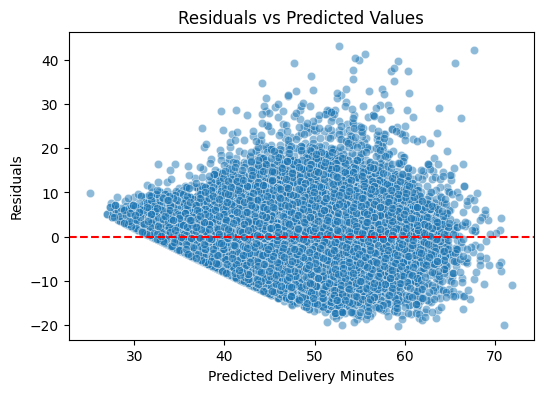

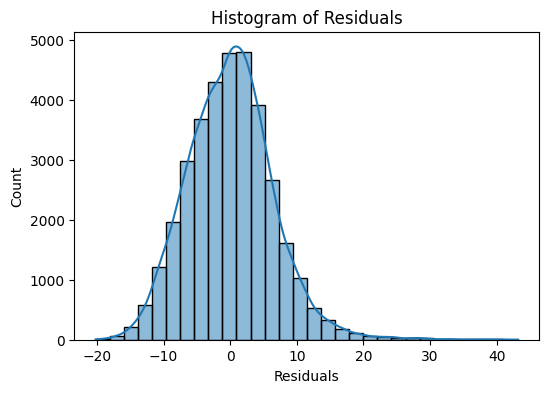

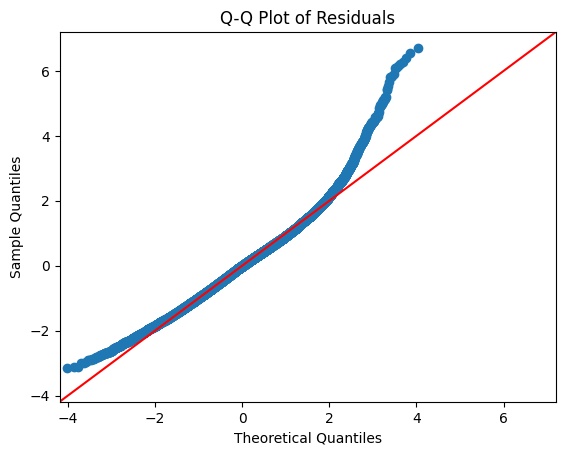

In [ ]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
residuals = y_test - y_test_pred
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Delivery Minutes")
plt.ylabel("Residuals")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.show()

sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

[Your inferences here:]The residual analysis provides useful insights into the performance of the linear regression model. The residuals vs predicted values plot shows that most residuals are centered around zero, but there is a funnel-shaped spread, with residuals increasing for higher predicted values. This suggests some degree of heteroscedasticity, meaning the model’s errors are not perfectly constant across the range of predictions. The Q–Q plot shows that residuals largely follow the normal distribution line in the middle range but deviate noticeably in the tails, indicating the presence of a few extreme values or outliers. The histogram of residuals is roughly bell-shaped and centered around zero, which supports the assumption of approximate normality. Overall, the model appears to perform reasonably well, with residuals distributed symmetrically around zero, but the presence of slight heteroscedasticity and deviations in the tails suggests that there are still some patterns in the data that a simple linear regression may not fully capture.



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

> Add blockquote



Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model

lr_scaled = LinearRegression()
lr_scaled.fit(X_train[final_features], y_train)

scaled_coefs = pd.DataFrame({
    "Feature": final_features,
    "Scaled_Coefficient": lr_scaled.coef_
})
print(scaled_coefs)

                    Feature  Scaled_Coefficient
0                 market_id           -0.740802
1            order_protocol           -0.946965
2                  subtotal           10.185926
3        num_distinct_items            2.491453
4  total_outstanding_orders            9.936277
5                  distance           21.906564
6              created_hour           -0.176267
7               created_day            0.026796


In [ ]:
#unscaled features
lr_unscaled = LinearRegression()
lr_unscaled.fit(X_train_original[final_features], y_train)

unscaled_coefs = pd.DataFrame({
    "Feature": final_features,
    "Unscaled_Coefficient": lr_unscaled.coef_
})
print(unscaled_coefs)

                    Feature  Unscaled_Coefficient
0                 market_id             -0.740802
1            order_protocol             -0.946965
2                  subtotal              0.001593
3        num_distinct_items              0.498291
4  total_outstanding_orders              0.051483
5                  distance              0.462945
6              created_hour             -0.176267
7               created_day              0.026796


In [ ]:
coef_comparison = scaled_coefs.merge(unscaled_coefs, on="Feature")
print(coef_comparison)

                    Feature  Scaled_Coefficient  Unscaled_Coefficient
0                 market_id           -0.740802             -0.740802
1            order_protocol           -0.946965             -0.946965
2                  subtotal           10.185926              0.001593
3        num_distinct_items            2.491453              0.498291
4  total_outstanding_orders            9.936277              0.051483
5                  distance           21.906564              0.462945
6              created_hour           -0.176267             -0.176267
7               created_day            0.026796              0.026796


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'distance'

feature = "distance"

# Train model with this feature added
lr_temp = LinearRegression()
lr_temp.fit(X_train_original[[feature]], y_train)

coef = lr_temp.coef_[0]
intercept = lr_temp.intercept_

print(f"Intercept: {intercept}")
print(f"Coefficient for {feature}: {coef}")

# Interpretation
print(f"Effect: Each additional {feature} increases delivery time by {coef:.4f} minutes")


Intercept: 35.4720609040069
Coefficient for distance: 0.49092475683695785
Effect: Each additional distance increases delivery time by 0.4909 minutes


**I dont have total_items feature in the final model henc ei have taken an example of disctance**

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes, dataset does contain categorical variables. Categorical variables do affect delivery time, but the effect is smaller compared to numerical features like distance and outstanding orders. order_protocol and market_id seem to have more noticeable influence, while store_primary_category is too diverse and imbalanced for clear insights without grouping rare categories.In the final model, RFE confirmed that market_id and order_protocol were useful enough to keep, while store_primary_category was dropped.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>It means we are keeping 20% of the data aside for testing and the remaining 80% for training.The training set (80%) is what we use to teach the model.The test set (20%) is what we use to check how well the model learned on data.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>The correlation was around 0.46, meaning as distance increases, delivery time also tends to increase, and this relationship is stronger than with any other feature.Other features like subtotal (0.41) and total_outstanding_orders (0.38) also showed moderate correlation, but distance clearly stands out as the most influential.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>I first looked at the boxplots of the target variable and other numerical features.The boxplots made it easy to see values that were much higher or lower than most of the data. I also used the summary statistics (.describe()) to check the minimum, maximum, and quartile values and confirm where the unusual values appeared.To handle the outliers, I used the IQR method.I thought to replace negative values with 0 but as there is no step asked in this notebookl i have skipped that.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>the top 3 features that significantly affect delivery time are:

1.   Distance – deliveries take longer as the distance increases, making this the strongest driver of delivery time.
2.   Total Outstanding Orders – when more orders are pending, delivery time goes up because the system is busier.
3.  Number of Distinct Items – more unique items in an order add complexity and increase preparation time, leading to slightly longer deliveries.









---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear Regression is one of the simplest and most widely used algorithms in machine learning and statistics.It tries to find a straight-line relationship between independent variables (features, X) and a dependent variable (target, y).e goal is to predict the target variable based on the input features.
Example: y=b0​+b1​x1​+b2​x2​+⋯+bn​xn​


*   y = predicted target (delivery time)
*  b0​= intercept (baseline value when all X = 0

It Works like


1.   Fit a line
2.  Least Squares Method


    *   The algorithm calculates predictions for each data point.
    *   It compares predictions with actual values (errors = residuals).
    *   It adjusts coefficients to minimize the sum of squared errors (SSE).
   

3.   Training
2.   Prediction- Once trained, the model can take new inputs and plug them into the equation to predict delivery time.

Assumptions of Linear Regression

For the algorithm to work well, some assumptions should hold:

Linearity: Relationship between features and target is linear.

Independence: Data points are independent.

Homoscedasticity: Residuals have constant variance.

Normality of errors: Residuals are normally distributed.

No multicollinearity: Features are not too highly correlated with each other.












---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>

1.  **Simple Linear Regression** :A regression model with only one independent variable (feature, X) and one dependent variable (target, y).y=b0​+b1​x

**Example: Delivery time vs Distance**

2.   **Multiple Linear Regression** :A regression model with two or more independent variables and one dependent variable.y=b0​+b1​x1​+b2​x2​+⋯+bn​xn​

**Example:Delivery time vs Distance + Items + Orders + Hour**







---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>In Linear Regression, we try to fit the best line (or plane) through the data.But what does “best” mean is he line should make as few errors as possible when predicting.The cost function is how we measure those errors.Think of the cost function as a landscape of error values.The cost function measures how wrong the model is.Linear Regression minimizes it (usually with OLS or Gradient Descent) to find the line that best fits the data.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>**Underfitting**

The model is too simple and cannot capture the patterns in the data.

Symptoms:

Performs poorly on training data (high error).

Also performs poorly on test data (high error).

Example:
Trying to predict delivery time using only a straight line when the relationship is more complex → the model misses important trends.

**Overfitting**
The model is too complex and learns not only the patterns but also the noise in the training data.

Symptoms:

Performs very well on training data (low error).

Performs poorly on test data (high error), because it memorized the training data instead of generalizing.

Example:
Adding too many unnecessary features (like every small detail about a store) → the model predicts training data perfectly but fails on test data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>A residual = Actual value – Predicted value.

Random scatter -- model is fine.

Patterns, curves, or funnels --model is missing something (maybe need transformations, interactions, or a different algorithm).

Residual plots are graphs of residuals vs predicted values (or vs features).
They help us check if the assumptions of linear regression are valid:

Linearity

If the model is correct, residuals should be randomly scattered around 0.

If you see a clear pattern (like a curve), it means the relationship isn’t truly linear.

Homoscedasticity (constant variance)

Residuals should have the same spread across all predicted values.

If residuals “fan out” (small at first, then big later), it means variance is not constant → problem.

Independence

Random scatter shows residuals are independent.

Patterns or clusters suggest something systematic is being missed.

Normality

By looking at a histogram or Q–Q plot of residuals, you can check if they are approximately normal.



